In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# 데이터 전처리

In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['Price']

# 매출 트렌드 분석

### 국가별 매출

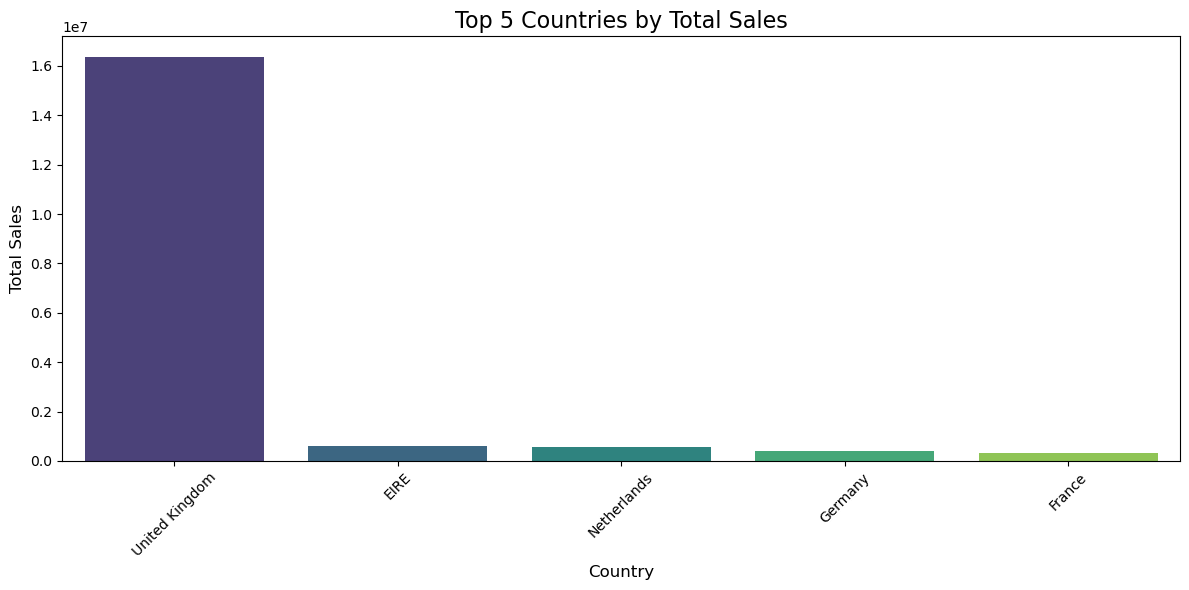

In [40]:
# 국가별 매출 집계
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()

# 매출이 큰 순서대로 정렬하고 상위 5개 국가 선택
top_countries = country_sales.nlargest(5, 'TotalPrice')

# 시각화: 상위 5개 국가 매출액
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='TotalPrice', data=top_countries, palette='viridis')
plt.title('Top 5 Countries by Total Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

### 국가별 매출 고객 순위

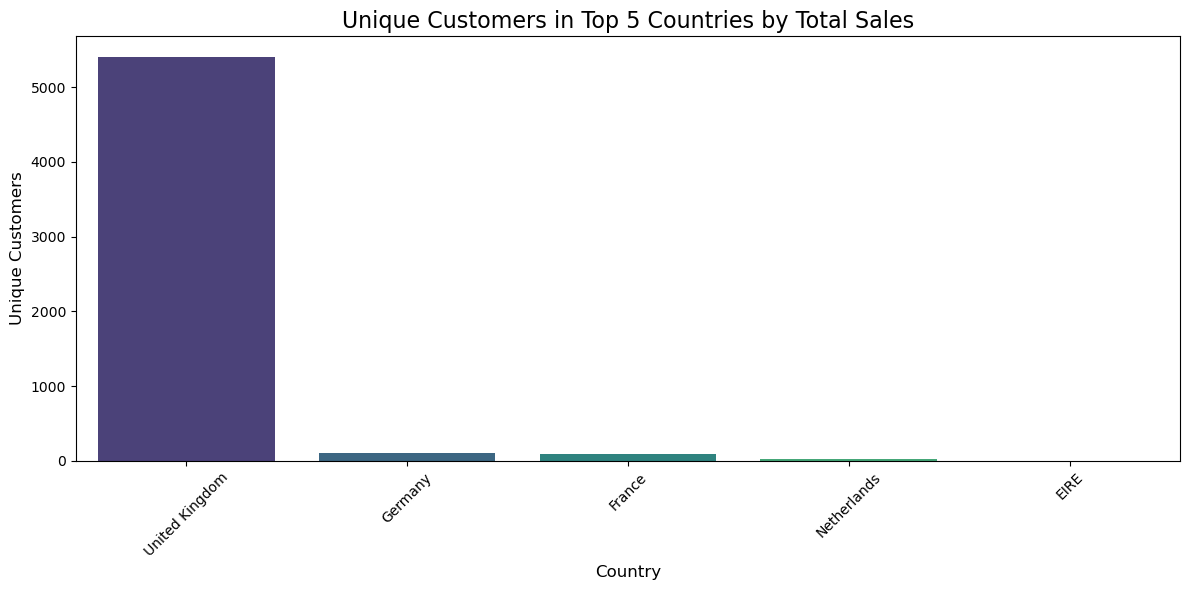

In [43]:
# 국가별 매출 집계
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()

# 매출이 큰 순서대로 정렬하고 상위 5개 국가 선택
top_countries = country_sales.nlargest(5, 'TotalPrice')['Country'].tolist()

# 상위 5개 국가에서의 고유 고객 수 계산
unique_customers = df[df['Country'].isin(top_countries)].groupby('Country')['Customer ID'].nunique().reset_index()

# 고객 수가 많은 순서로 정렬
unique_customers = unique_customers.sort_values(by='Customer ID', ascending=False)

# 시각화: 고유 고객 수
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Customer ID', data=unique_customers, palette='viridis')
plt.title('Unique Customers in Top 5 Countries by Total Sales', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Unique Customers', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

### 전체 매출 중 영국의 매출과 그 외 국가의 비중

/tmp/ipykernel_11172/3640116416.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries['Percentage'] = (top_countries['TotalPrice'] / total_sales) * 100


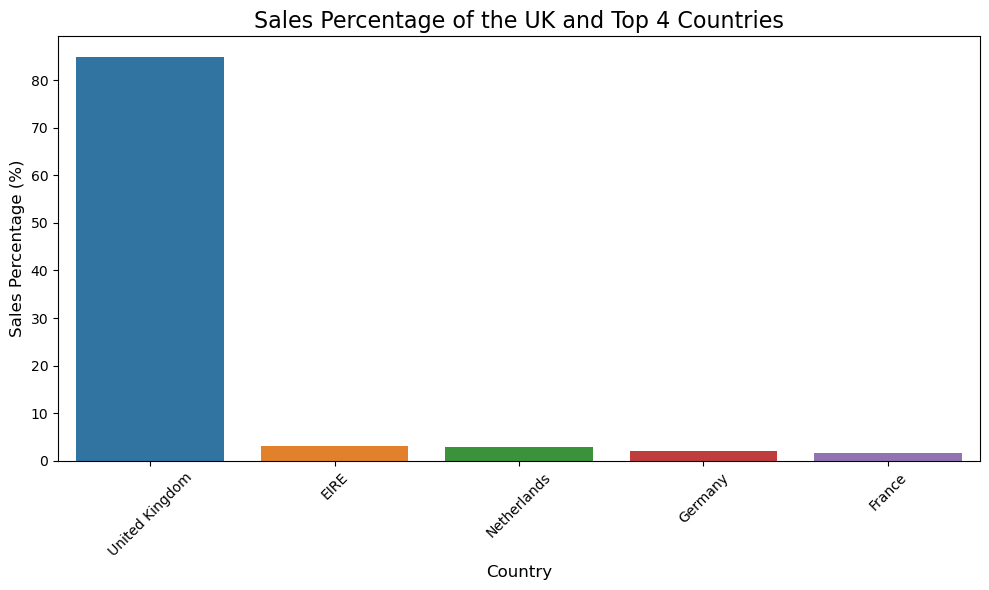

In [38]:
# 국가별 매출 집계
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()

# 매출이 큰 순서대로 정렬
country_sales = country_sales.sort_values(by='TotalPrice', ascending=False)

# 영국과 상위 4개 국가 선택
top_countries = country_sales.head(5)

# 전체 매출 계산
total_sales = country_sales['TotalPrice'].sum()

# 비중 계산
top_countries['Percentage'] = (top_countries['TotalPrice'] / total_sales) * 100

# 시각화: 영국과 상위 4개 국가의 매출 비중
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Percentage', data=top_countries)
plt.title('Sales Percentage of the UK and Top 4 Countries', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Sales Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

### YOY (Year Over Year)

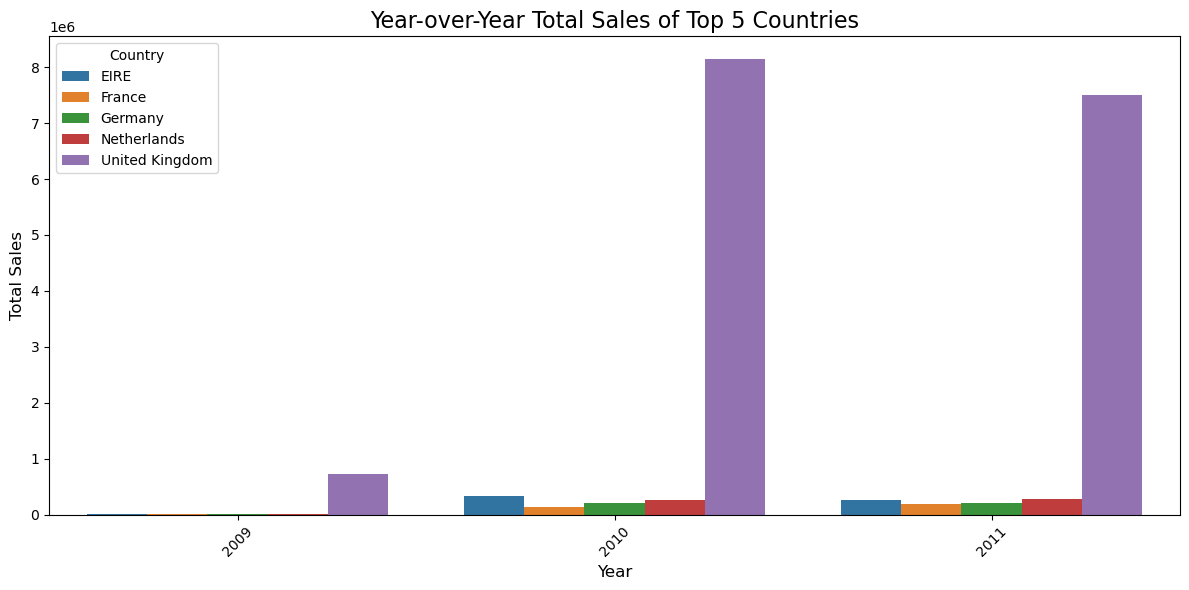

In [34]:
# 국가별 매출 집계
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()

# 매출이 큰 순서대로 정렬
top_countries = country_sales.nlargest(5, 'TotalPrice')['Country'].tolist()

# 연도별 매출 집계 (상위 5개 국가)
df['InvoiceYear'] = df['InvoiceDate'].dt.year
yoy_sales = df[df['Country'].isin(top_countries)].groupby(['InvoiceYear', 'Country'])['TotalPrice'].sum().reset_index()

# 시각화: YoY
plt.figure(figsize=(12, 6))
sns.barplot(x='InvoiceYear', y='TotalPrice', hue='Country', data=yoy_sales)
plt.title('Year-over-Year Total Sales of Top 5 Countries', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()

plt.show()

### MOM (Month Over Month)

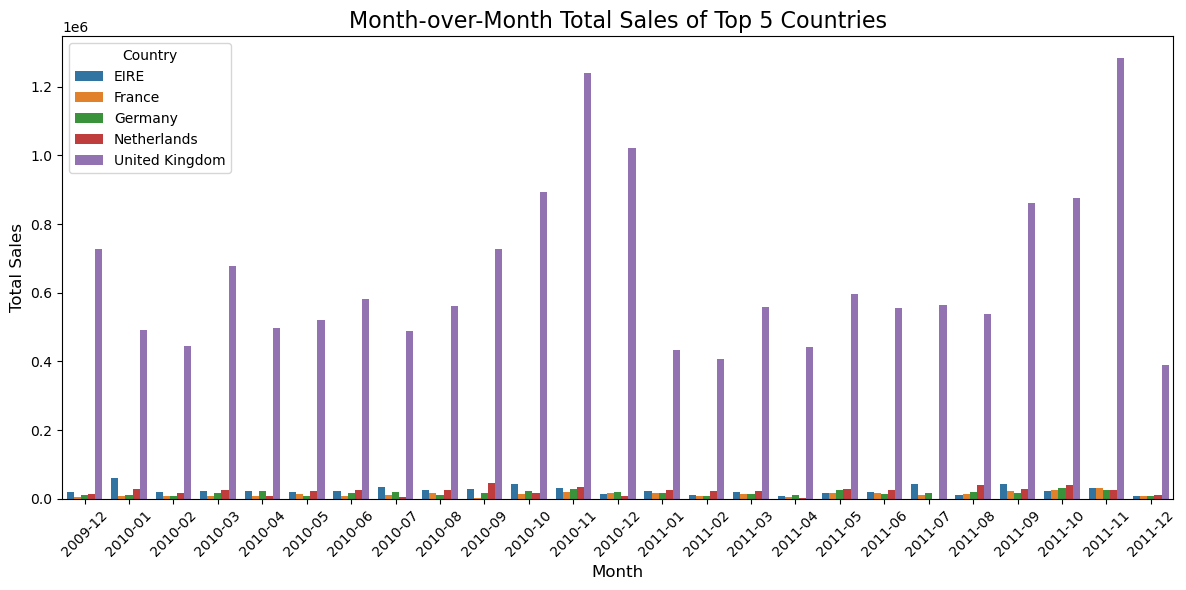

In [36]:
# 월별 매출 집계 (상위 5개 국가)
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
mom_sales = df[df['Country'].isin(top_countries)].groupby(['InvoiceMonth', 'Country'])['TotalPrice'].sum().reset_index()

# 시각화: MoM
plt.figure(figsize=(12, 6))
sns.barplot(x='InvoiceMonth', y='TotalPrice', hue='Country', data=mom_sales)
plt.title('Month-over-Month Total Sales of Top 5 Countries', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()

plt.show()

### 시간대별 매출

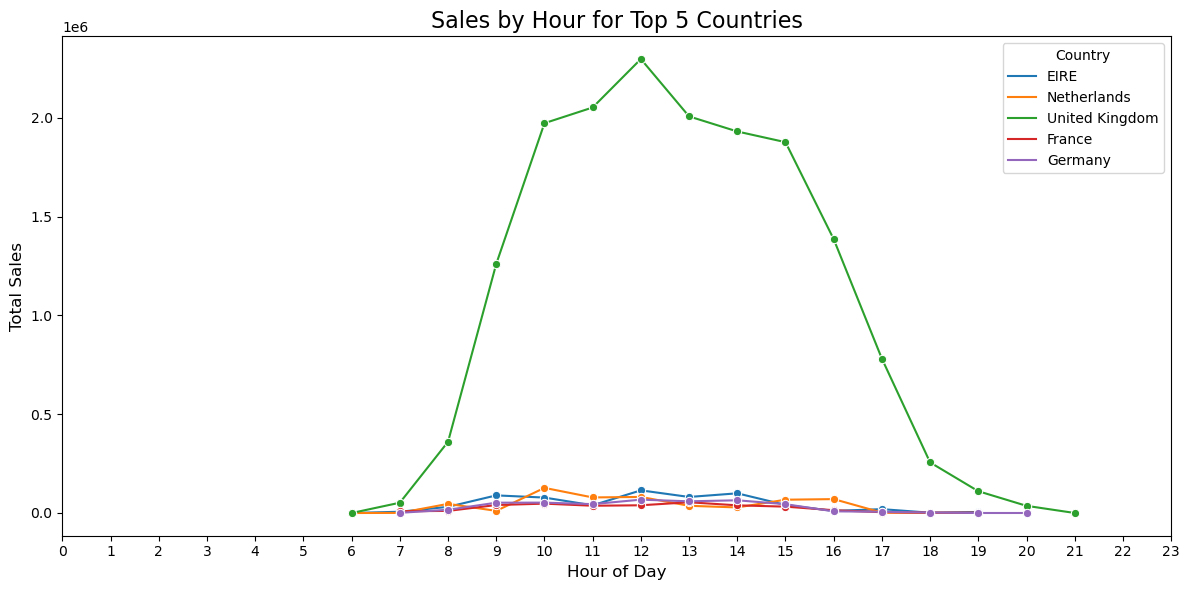

In [37]:
# 국가별 매출 집계
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()

# 매출이 큰 순서대로 정렬하고 상위 5개 국가 선택
top_countries = country_sales.nlargest(5, 'TotalPrice')['Country'].tolist()

# 시간대별 매출 집계 (상위 5개 국가)
df['InvoiceHour'] = df['InvoiceDate'].dt.hour
hourly_sales = df[df['Country'].isin(top_countries)].groupby(['InvoiceHour', 'Country'])['TotalPrice'].sum().reset_index()

# 시각화: 시간대별 매출
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_sales, x='InvoiceHour', y='TotalPrice', hue='Country', marker='o')
plt.title('Sales by Hour for Top 5 Countries', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(range(0, 24))  # 0부터 23까지 시간 표시
plt.legend(title='Country')
plt.tight_layout()
plt.show()

# 제품 선호도 분석

### 국가별 선호하는 제품

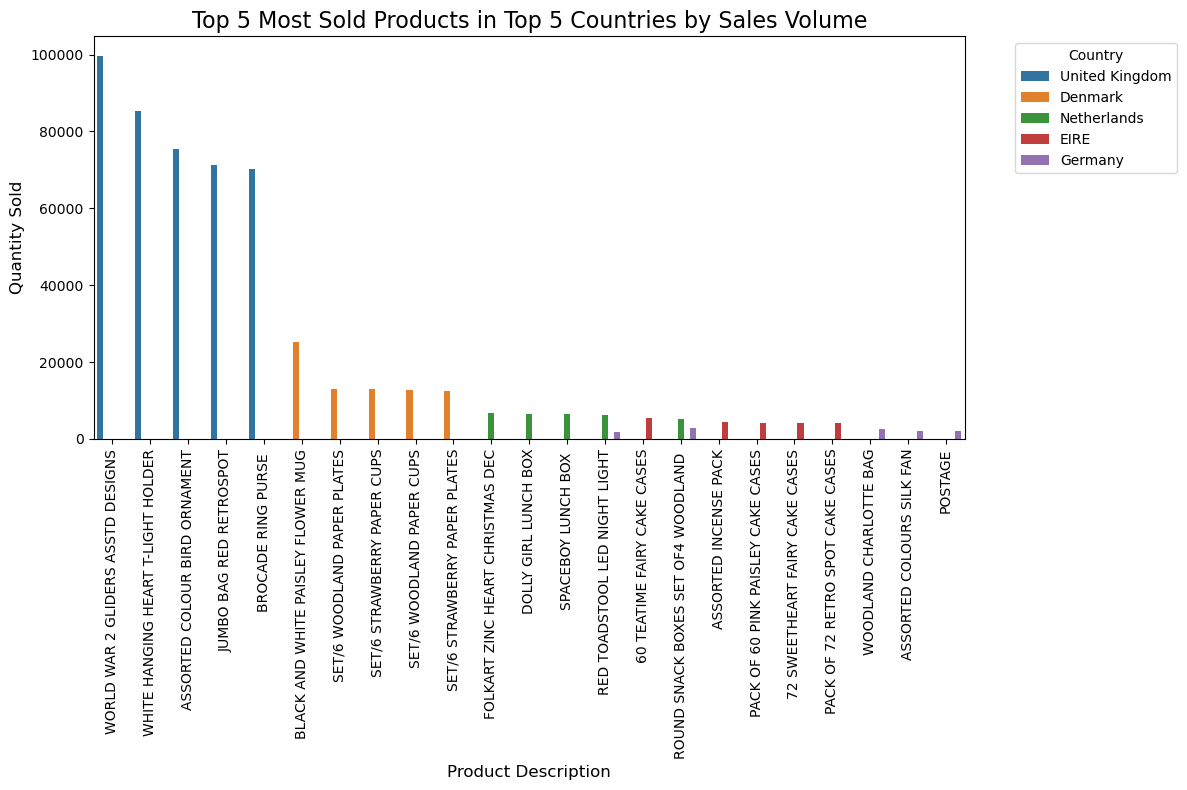

In [32]:
# 국가별 매출 집계
country_sales = df.groupby('Country')['Quantity'].sum().reset_index()

# 판매량이 높은 상위 5개 국가 선택
top_countries = country_sales.nlargest(5, 'Quantity')['Country'].tolist()

# 상위 5개 국가에서의 제품 판매량 집계
country_product_sales = df[df['Country'].isin(top_countries)].groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

# 각 국가에서 가장 많이 팔린 제품 상위 5개 선택
top_products_by_country = country_product_sales.groupby('Country').apply(lambda x: x.nlargest(5, 'Quantity')).reset_index(drop=True)

# 판매량 기준으로 정렬 (내림차순)
top_products_by_country = top_products_by_country.sort_values(by='Quantity', ascending=False)

# 시각화: 국가별 상위 5개 제품
plt.figure(figsize=(12, 8))
sns.barplot(x='Description', y='Quantity', hue='Country', data=top_products_by_country)
plt.title('Top 5 Most Sold Products in Top 5 Countries by Sales Volume', fontsize=16)
plt.xlabel('Product Description', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Quantity Sold', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 그래프 출력
plt.show()

# 고객 행동 분석

### 구매 빈도 분석

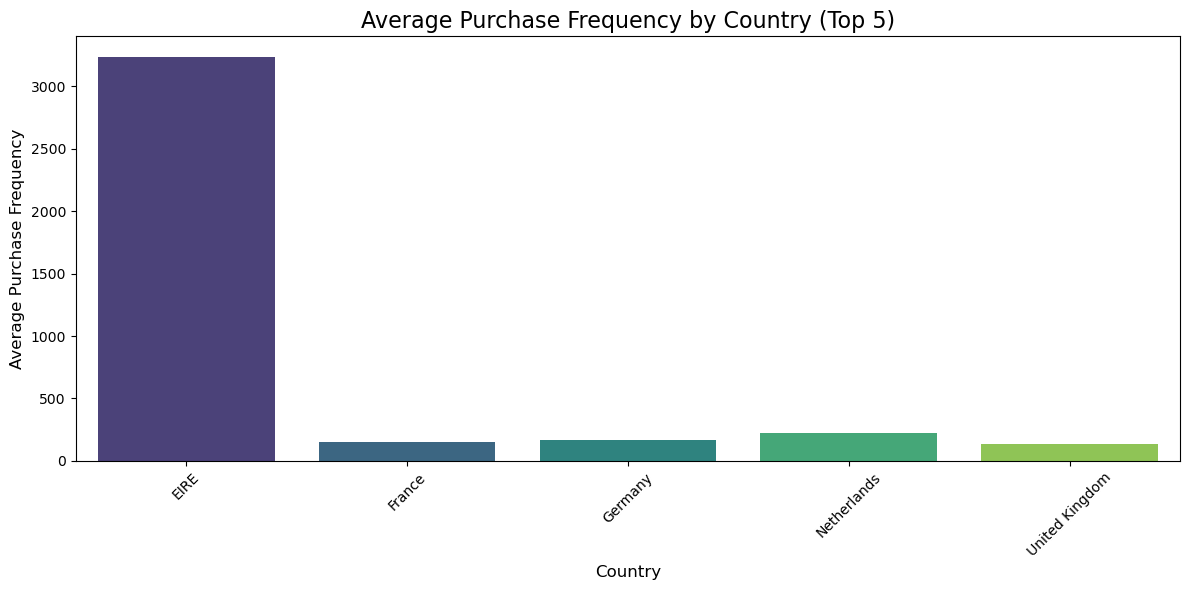

In [47]:
# 매출액이 높은 상위 5개 국가 선택
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()
top_countries = country_sales.nlargest(5, 'TotalPrice')['Country'].tolist()

# 고객별 구매 횟수 집계 (상위 5개 국가)
purchase_frequency = df[df['Country'].isin(top_countries)].groupby(['Country', 'Customer ID']).size().reset_index(name='PurchaseCount')

# 국가별 평균 구매 빈도
avg_purchase_frequency = purchase_frequency.groupby('Country')['PurchaseCount'].mean().reset_index()

# 시각화: 평균 구매 빈도
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='PurchaseCount', data=avg_purchase_frequency, palette='viridis')
plt.title('Average Purchase Frequency by Country (Top 5)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Purchase Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 주문 크기 분석

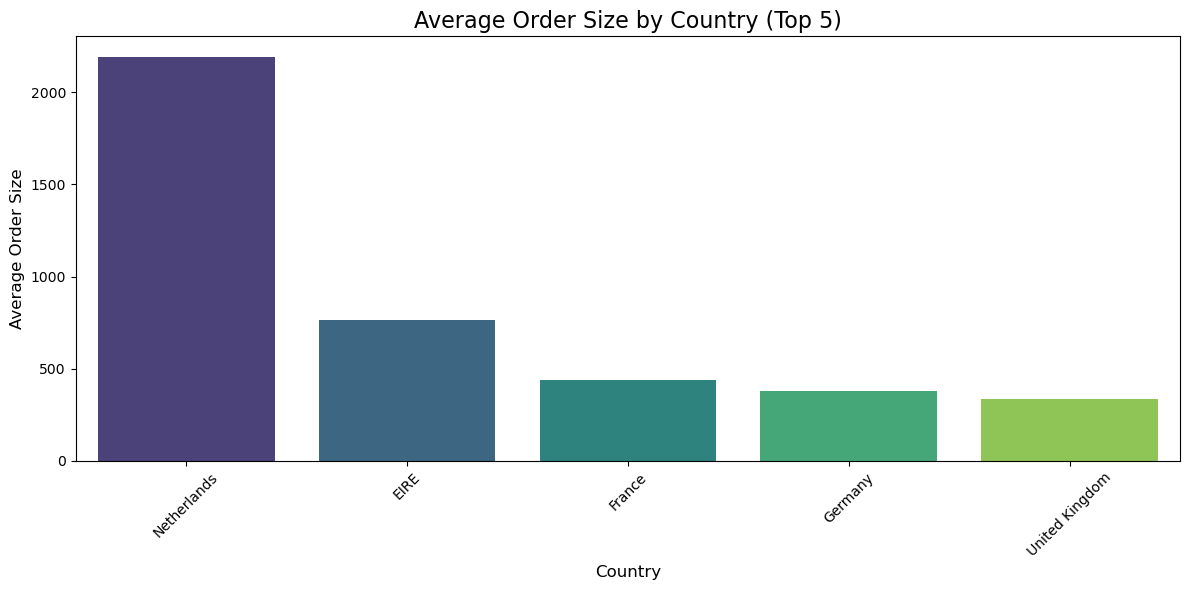

In [52]:
# 매출액이 높은 상위 5개 국가 선택
country_sales = df.groupby('Country')['TotalPrice'].sum().reset_index()
top_countries = country_sales.nlargest(5, 'TotalPrice')['Country'].tolist()

# 국가별 주문 집계 (상위 5개 국가)
order_size = df[df['Country'].isin(top_countries)].groupby(['Country', 'Invoice'])['TotalPrice'].sum().reset_index()

# 국가별 평균 주문 크기
avg_order_size = order_size.groupby('Country')['TotalPrice'].mean().reset_index()

# 평균 주문 크기를 높은 순서로 정렬
avg_order_size = avg_order_size.sort_values(by='TotalPrice', ascending=False)

# 시각화: 평균 주문 크기
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='TotalPrice', data=avg_order_size, palette='viridis')
plt.title('Average Order Size by Country (Top 5)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Order Size', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

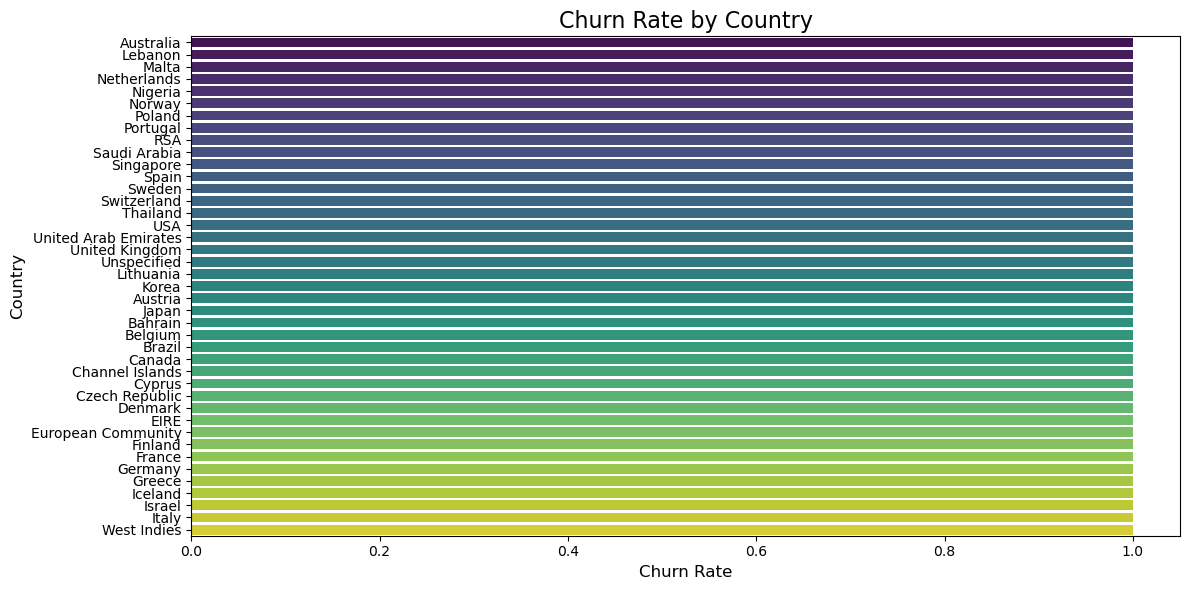

In [53]:
# 고객별 마지막 구매 날짜 계산
last_purchase_date = df.groupby(['Country', 'Customer ID'])['InvoiceDate'].max().reset_index()
last_purchase_date['DaysSinceLastPurchase'] = (pd.to_datetime('today') - last_purchase_date['InvoiceDate']).dt.days

# 이탈 고객 정의: 최근 구매일이 365일 이상인 경우
churned_customers = last_purchase_date[last_purchase_date['DaysSinceLastPurchase'] > 365]

# 각 국가별 고객 수 및 이탈 고객 수 집계
total_customers = last_purchase_date.groupby('Country')['Customer ID'].nunique().reset_index(name='TotalCustomers')
churned_customers_count = churned_customers.groupby('Country')['Customer ID'].nunique().reset_index(name='ChurnedCustomers')

# 이탈률 계산
churn_rate = pd.merge(total_customers, churned_customers_count, on='Country', how='left').fillna(0)
churn_rate['ChurnRate'] = churn_rate['ChurnedCustomers'] / churn_rate['TotalCustomers']

# 시각화: 이탈률
plt.figure(figsize=(12, 6))
sns.barplot(x='ChurnRate', y='Country', data=churn_rate.sort_values(by='ChurnRate', ascending=False), palette='viridis')
plt.title('Churn Rate by Country', fontsize=16)
plt.xlabel('Churn Rate', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

# 참고 매출 자료

### 전체 매출 YOY (Year over Year)

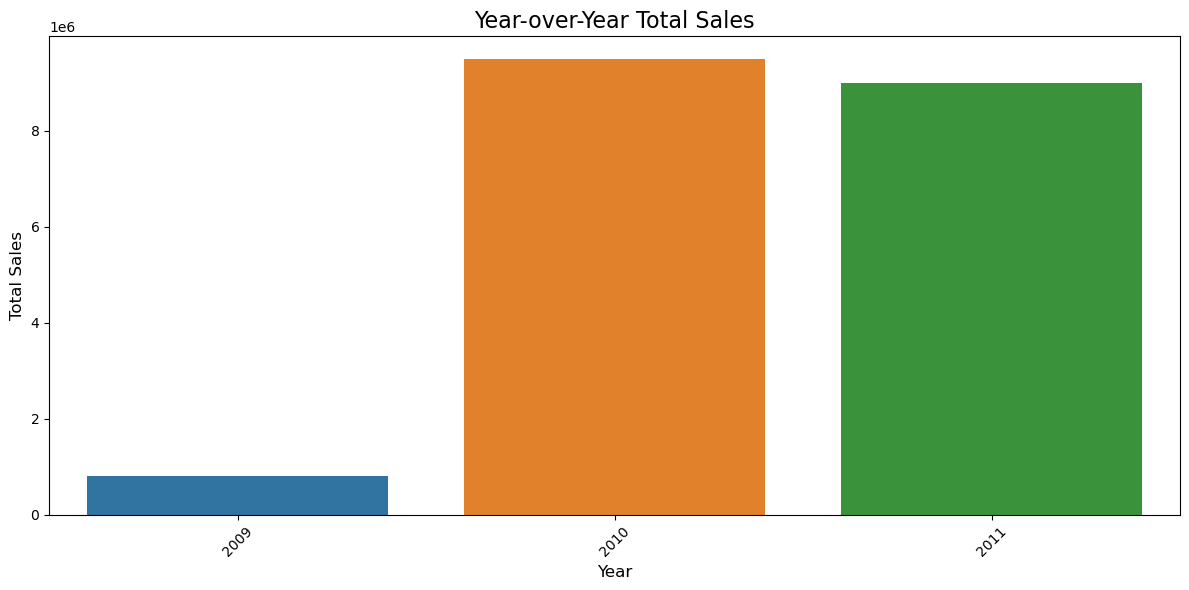

In [29]:
# 연도별 매출 집계
df['InvoiceYear'] = df['InvoiceDate'].dt.year
yoy_sales = df.groupby('InvoiceYear')['TotalPrice'].sum().reset_index()

# 시각화: YoY
plt.figure(figsize=(12, 6))
sns.barplot(x='InvoiceYear', y='TotalPrice', data=yoy_sales)
plt.title('Year-over-Year Total Sales', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 출력
plt.show()

### 전체 매출 MoM (Month over Month)

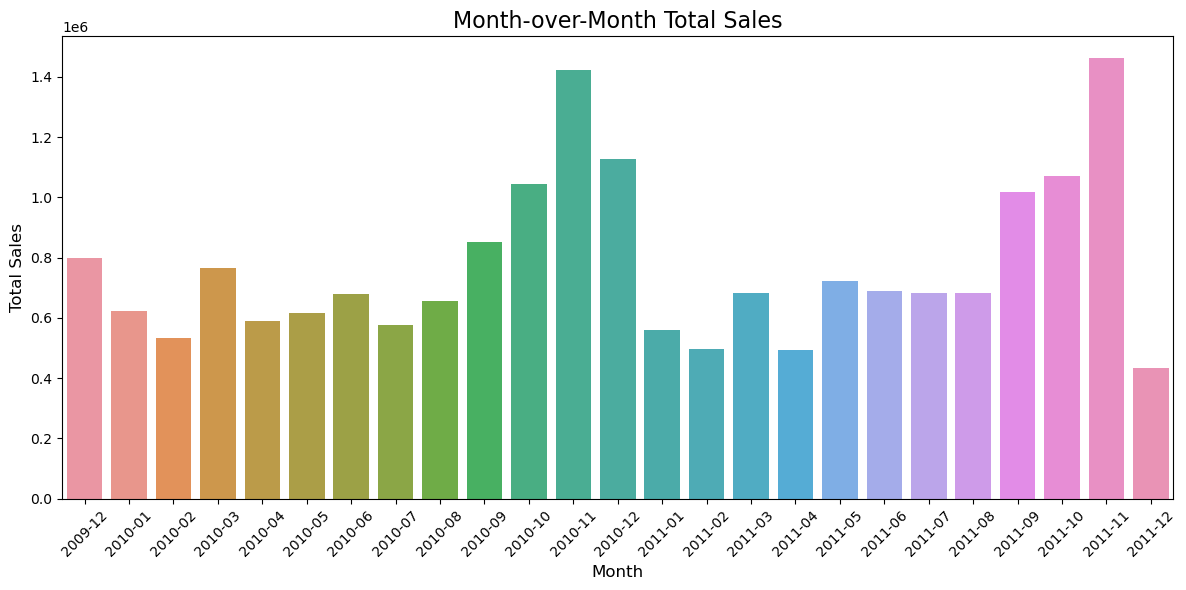

In [30]:
# 월별 매출 집계
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
mom_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()

# 시각화: MoM
plt.figure(figsize=(12, 6))
sns.barplot(x='InvoiceMonth', y='TotalPrice', data=mom_sales)
plt.title('Month-over-Month Total Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()